### Loading the data and importing libraries:

In [1]:
#Importing basic libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
#Importing libraries for scaling and KMeans Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
#Importing libraries for Hierarchical CLustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
#Reading the data
df= pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Inspecting the null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

As we can see, there are no null values in any of the columns.

In [9]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

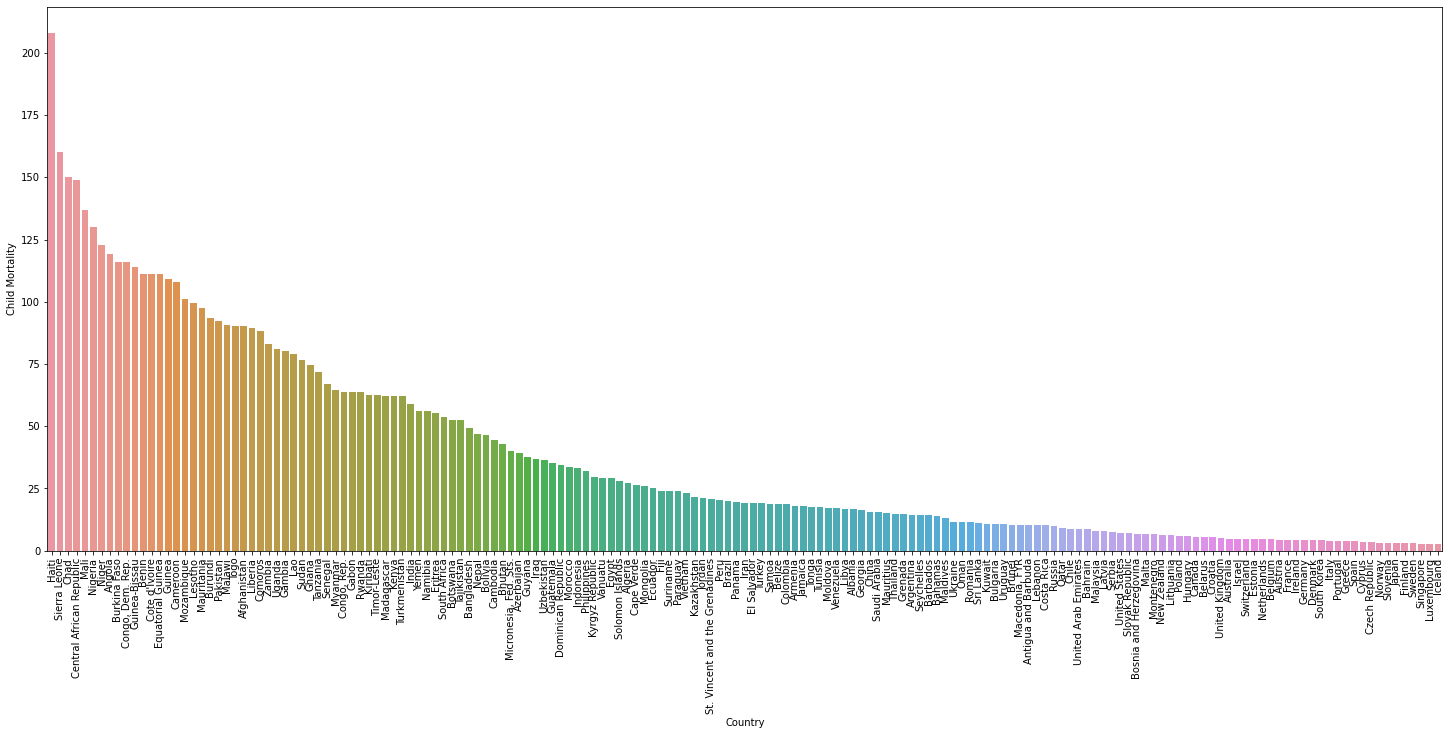

In [11]:
#Visualizing the Child Mortality for all the countries
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='child_mort',data=df.sort_values('child_mort', ascending = False))
plt.ylabel('Child Mortality')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

As we can see, there is a huge variance in Child Mortality across different countries. Our aim is to help countries with highest Child Mortaity as these are the countries with urgent need of aid.

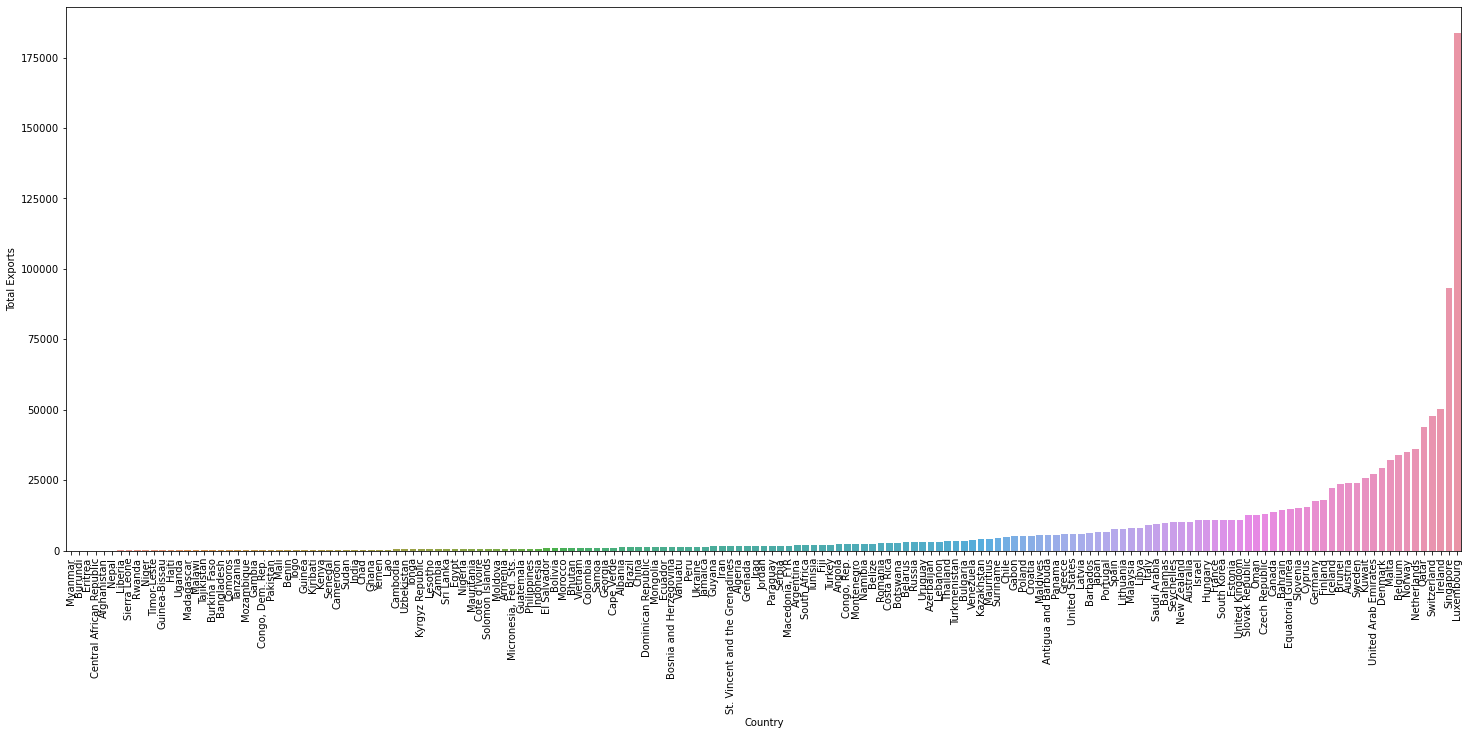

In [12]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='exports',data=df.sort_values('exports', ascending = True))
plt.ylabel('Total Exports')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

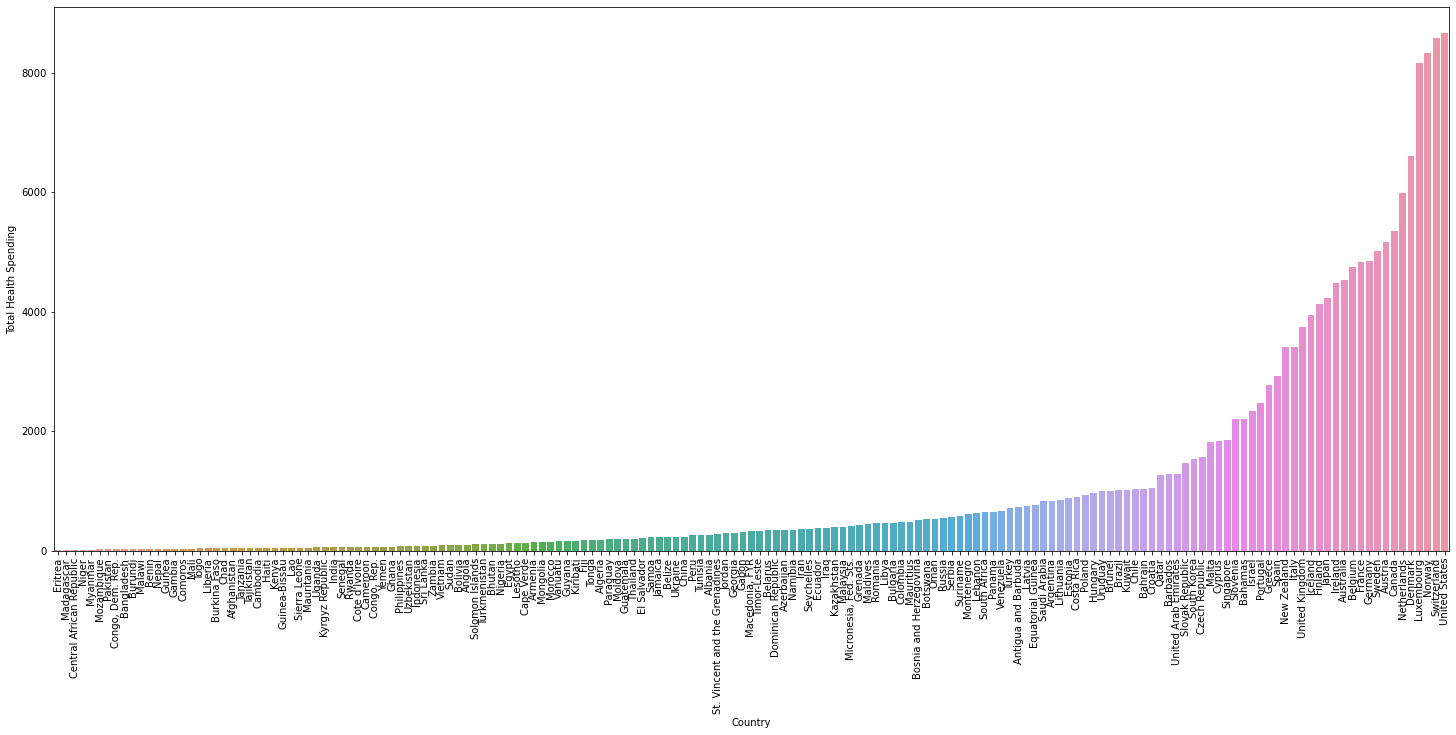

In [13]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='health',data=df.sort_values('health', ascending = True))
plt.ylabel('Total Health Spending')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

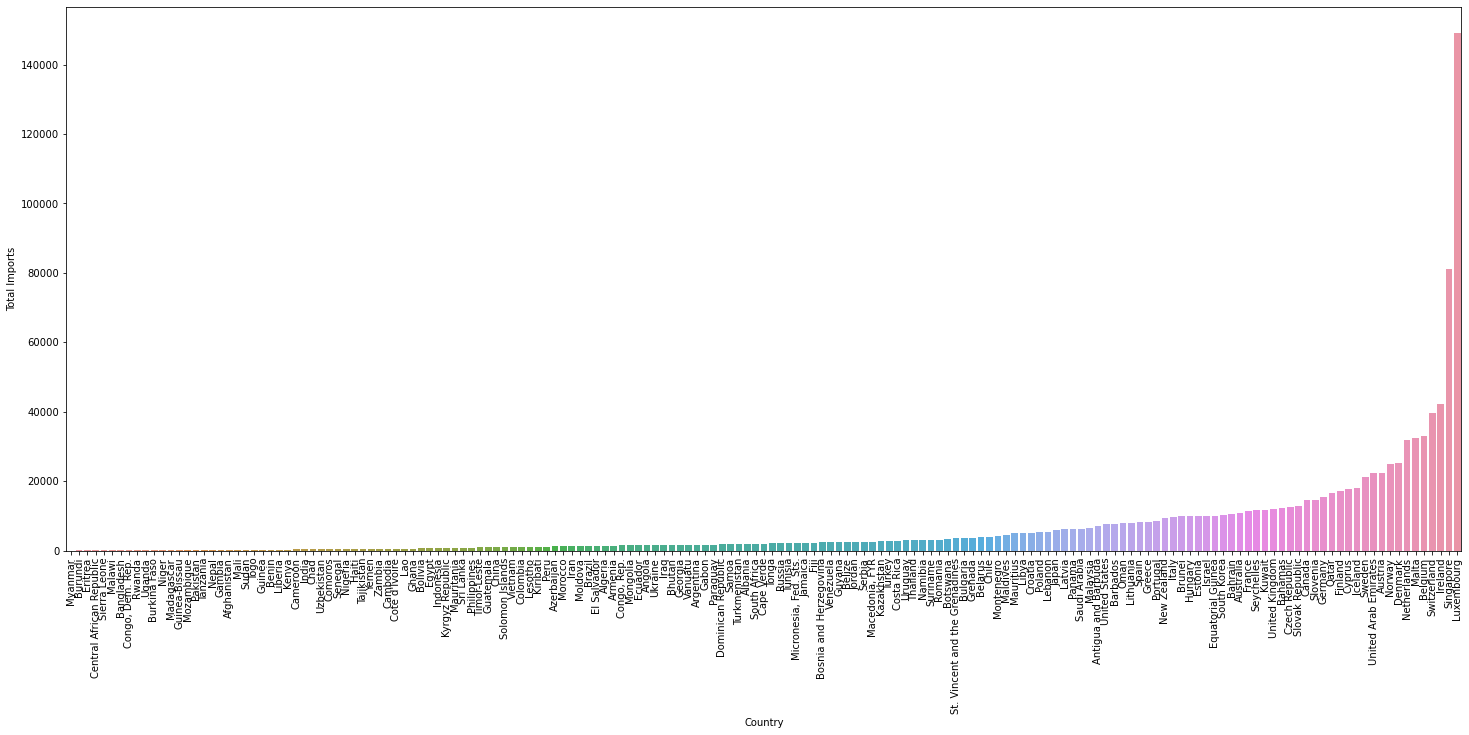

In [14]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='imports',data=df.sort_values('imports', ascending = True))
plt.ylabel('Total Imports')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

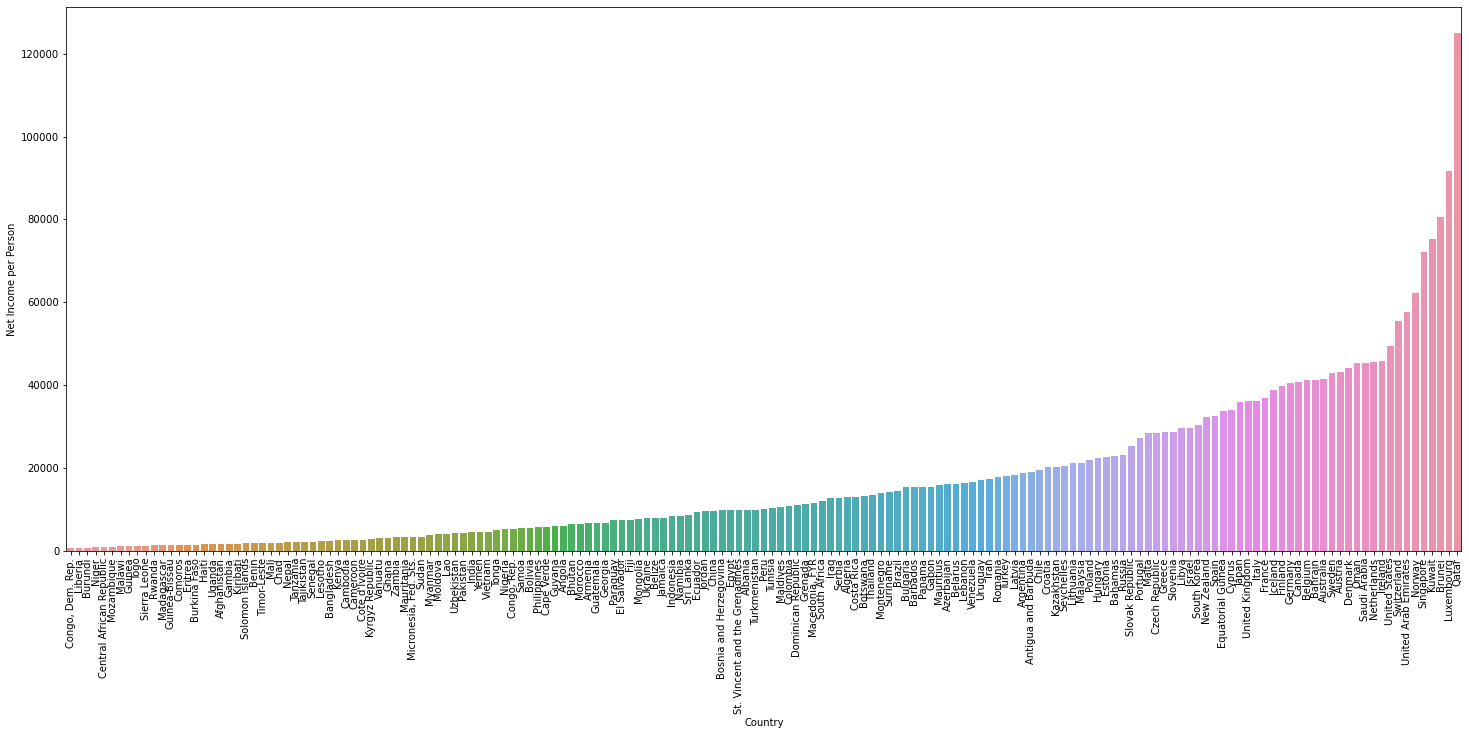

In [15]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='income',data=df.sort_values('income', ascending = True))
plt.ylabel('Net Income per Person')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

**Import, Export and Income of these countries show huge variance. Countries with the least values are the ones with the worst socio-economic conditions.**

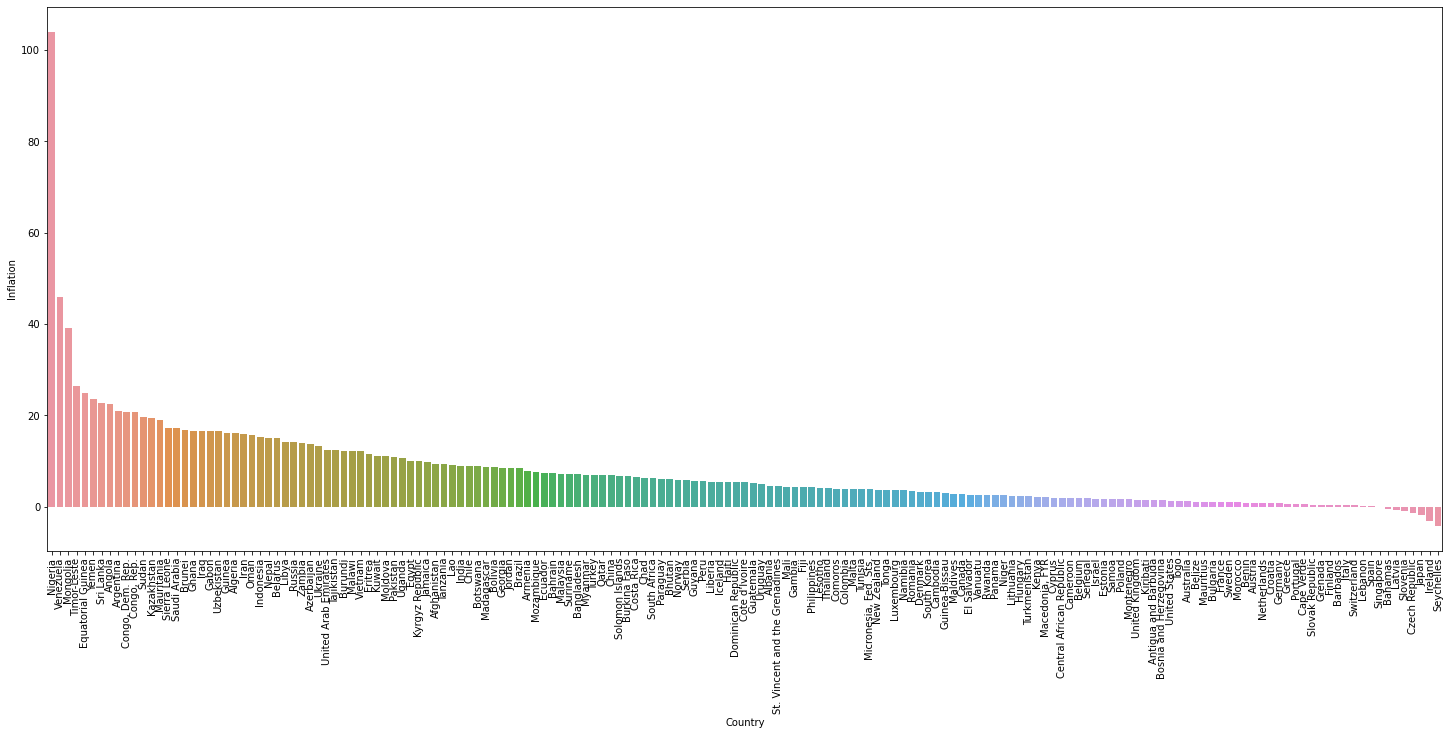

In [16]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='inflation',data=df.sort_values('inflation', ascending = False))
plt.ylabel('Inflation')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

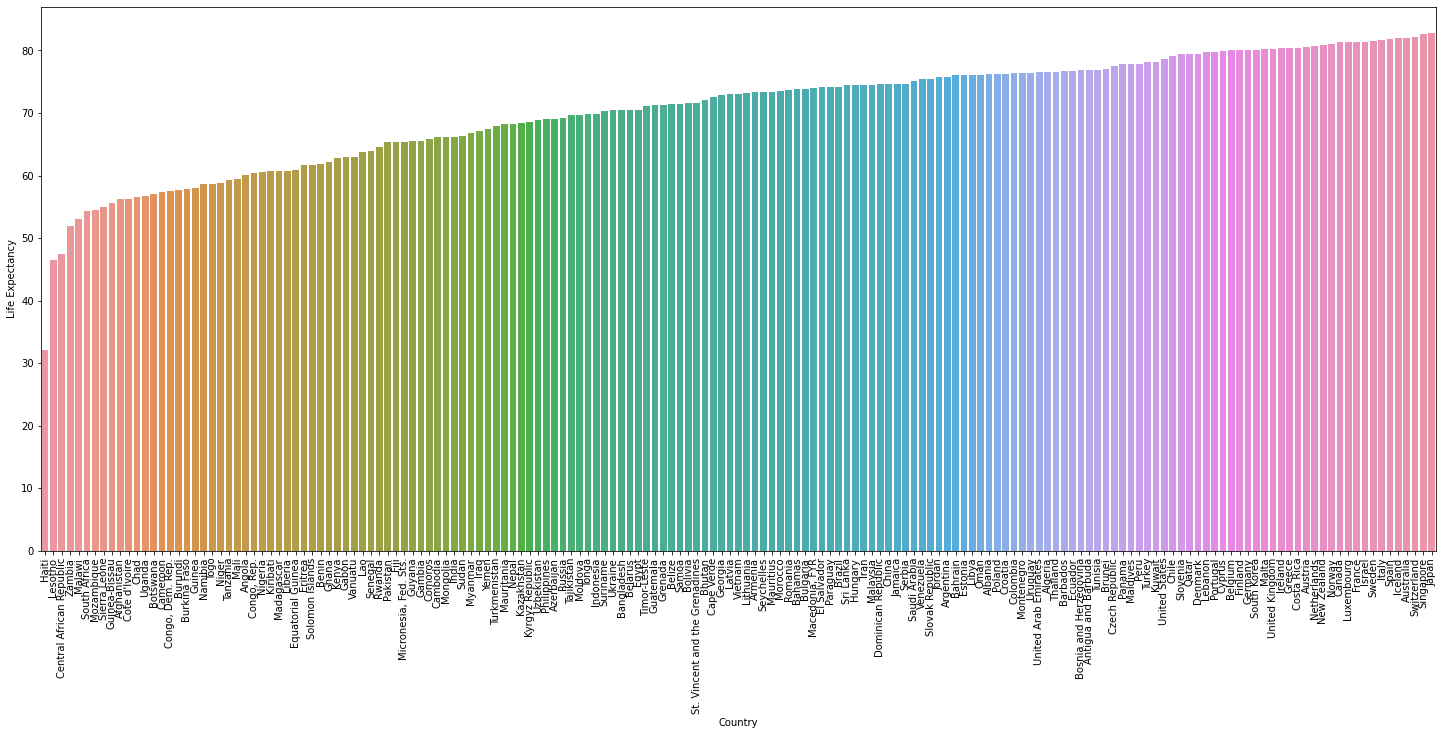

In [17]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='life_expec',data=df.sort_values('life_expec', ascending = True))
plt.ylabel('Life Expectancy')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

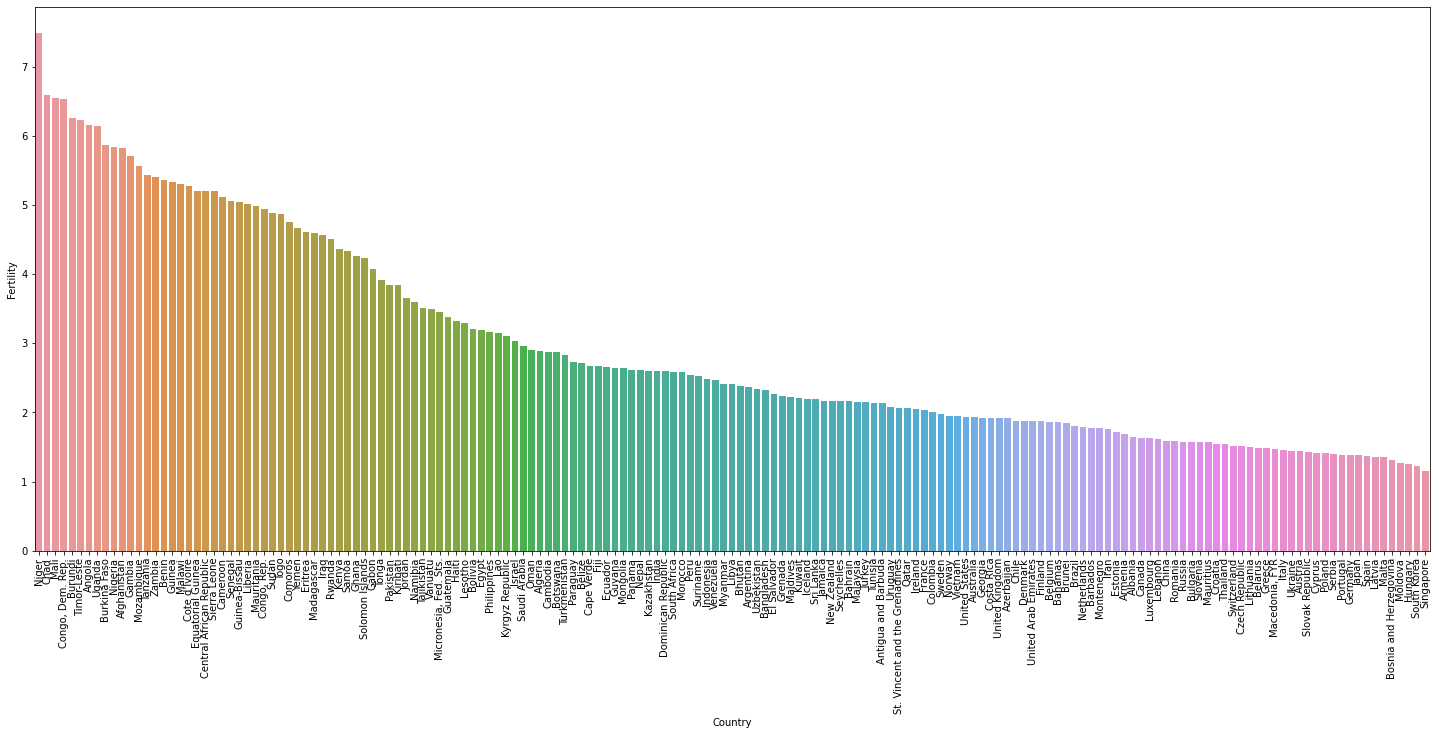

In [18]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='total_fer',data=df.sort_values('total_fer', ascending = False))
plt.ylabel('Fertility')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

**Life expectancy and total fertility are good indicators of a country's healthcare. Countries with low life expectancy and high fertility are genrally regarded as those with worse healthcare.**

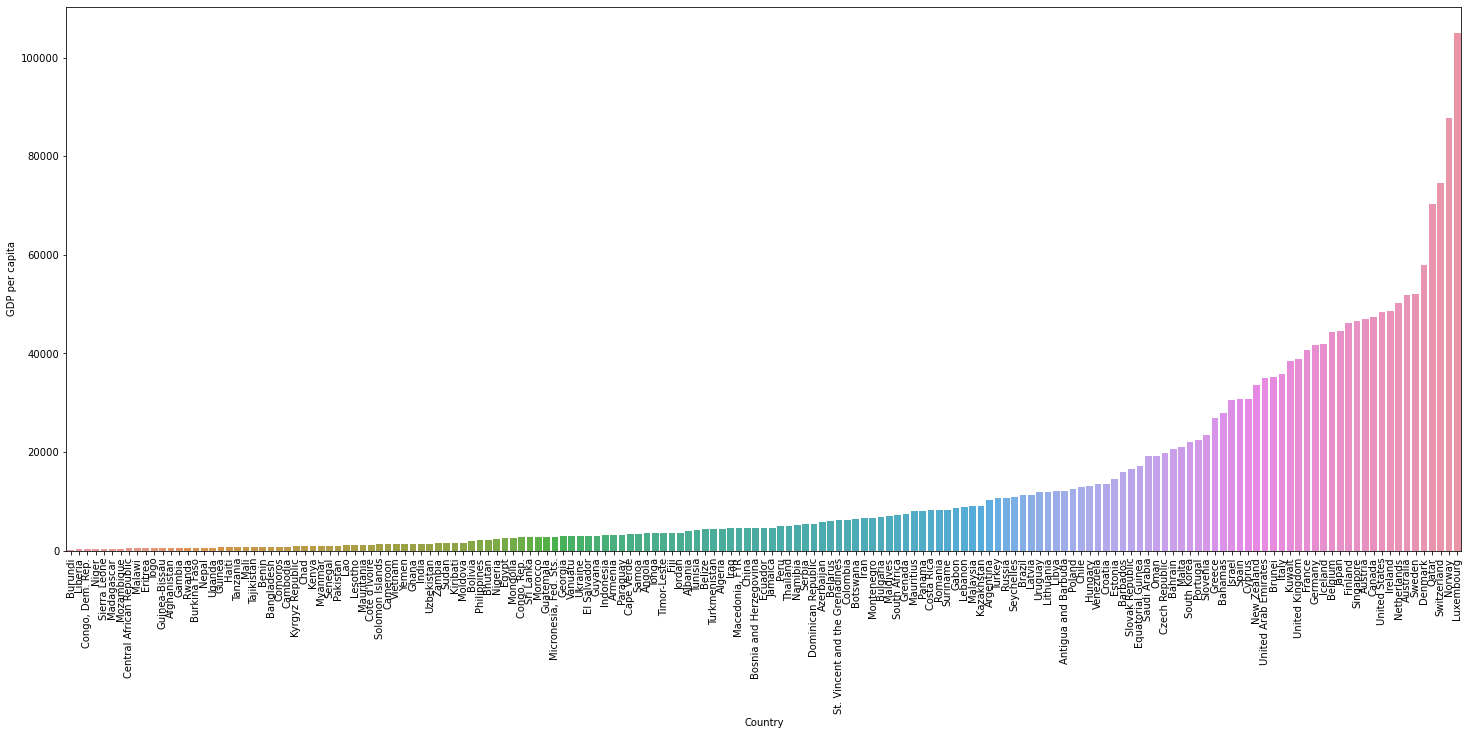

In [19]:
plt.figure(figsize=[25,10])
sns.barplot(x='country',y='gdpp',data=df.sort_values('gdpp', ascending = True))
plt.ylabel('GDP per capita')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

**Countries with the lowest GDP per capita are the ones in need of financial aid as these are the countries with extremely dire financial conditions.

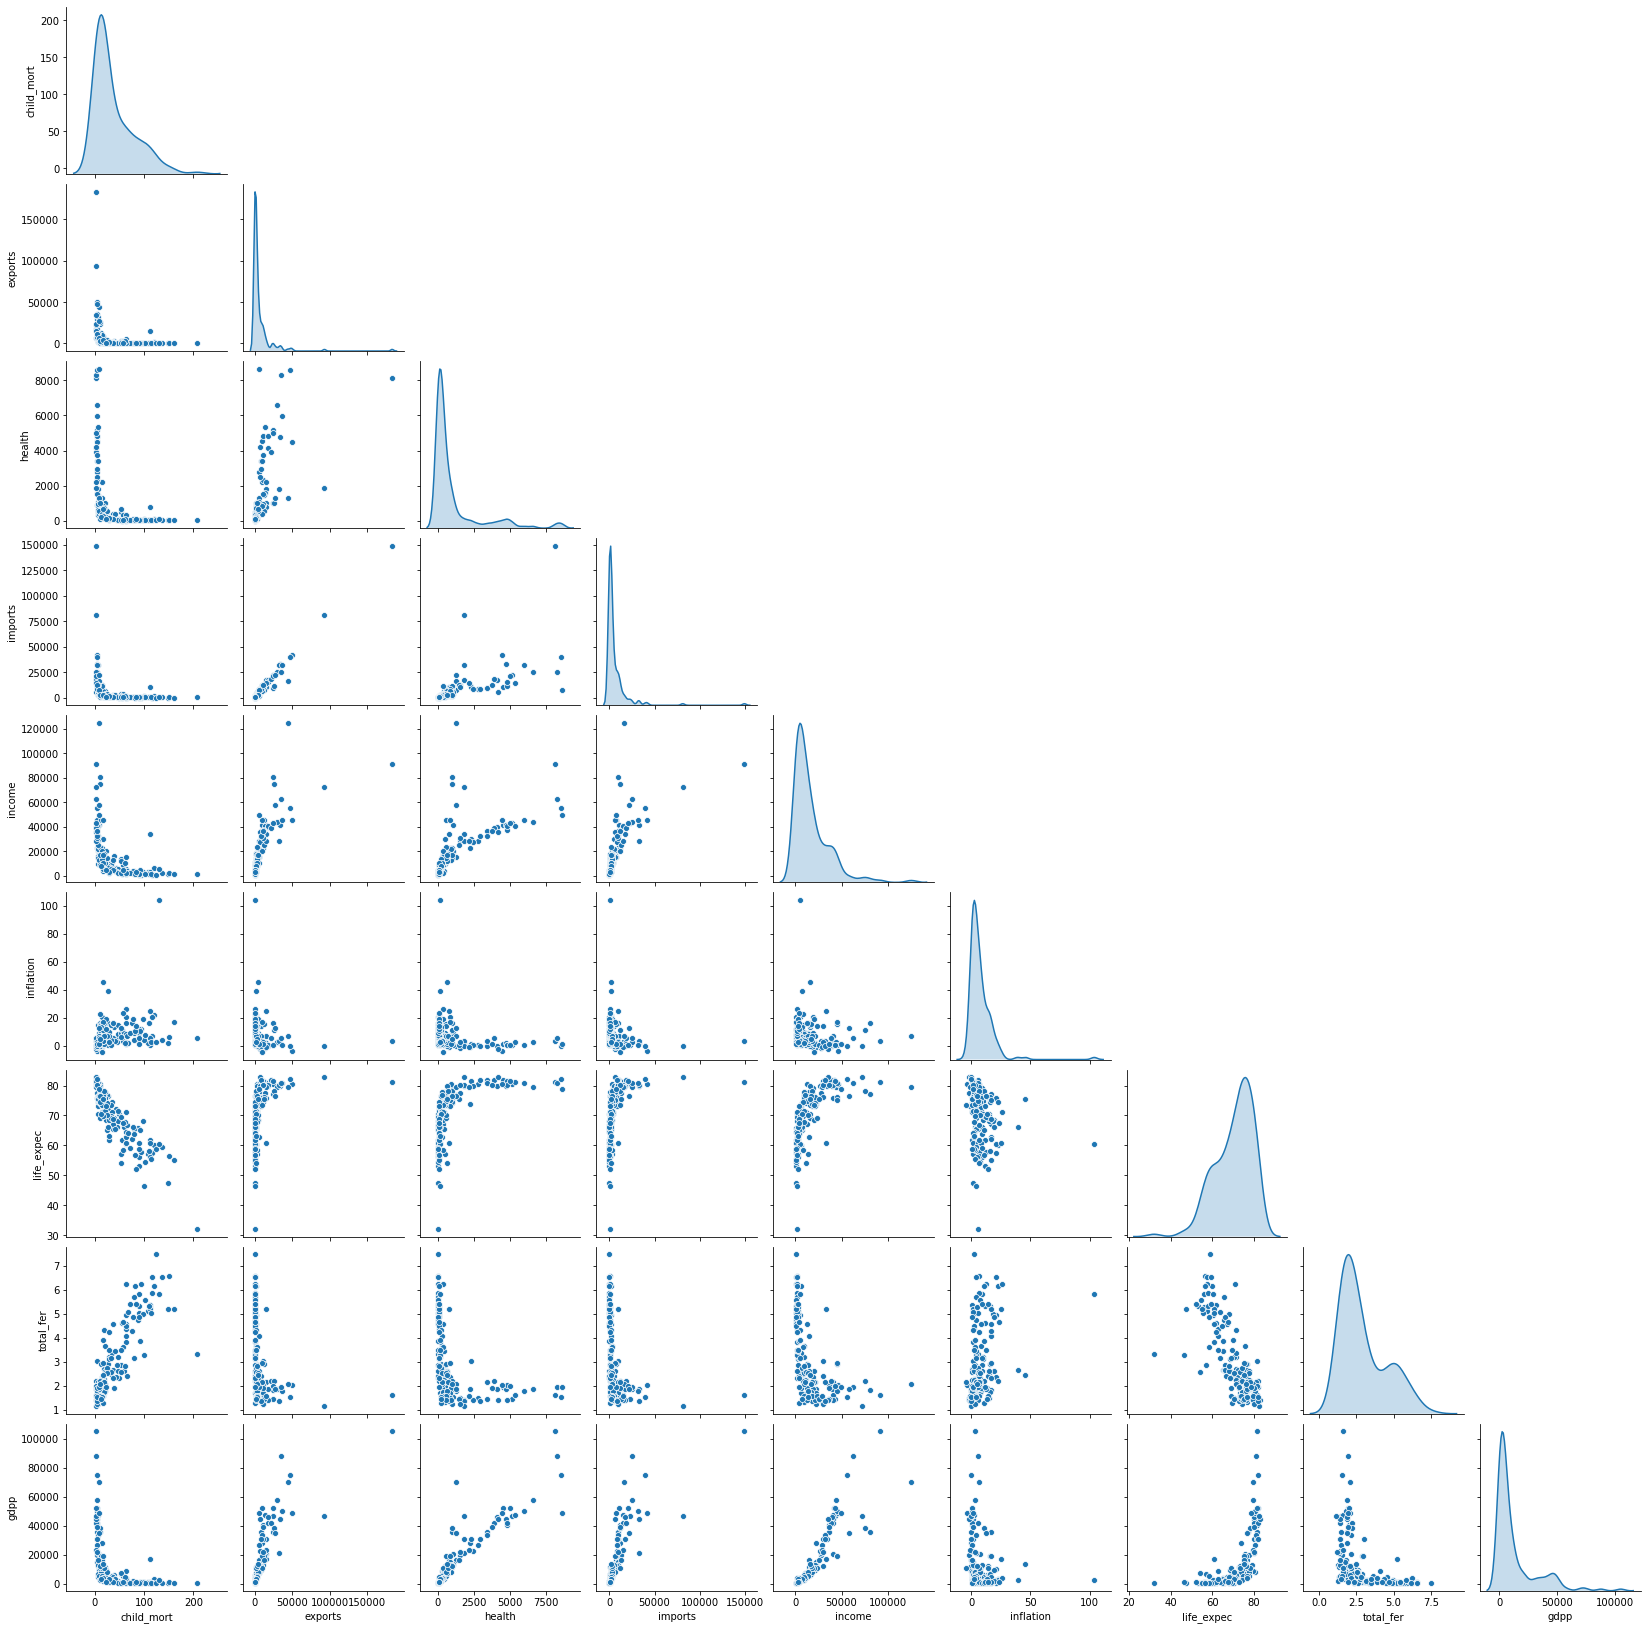

In [20]:
pp = sns.pairplot(df,diag_kind='kde')
for i, j in zip(*np.triu_indices_from(pp.axes, 1)):
    pp.axes[i, j].set_visible(False)

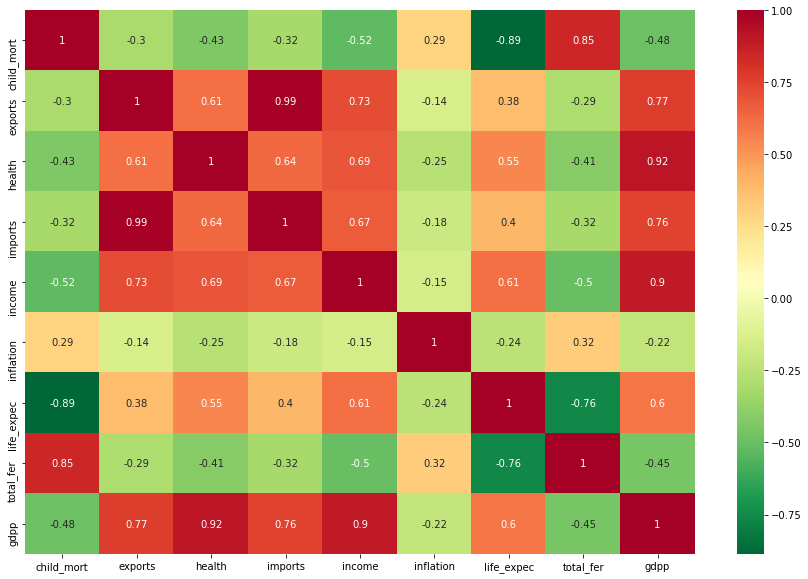

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn_r')
plt.show()

***From the pairplot and the heatmap, we can make out that:***
- 'child_mort' and 'life_expec' have a strong negative correlation. A country with high child mortality and low life expectancy has very poor healthcare and vice-versa.
- 'imports' and 'exports' have a strong positive correlation and indicate a country's financial condition. Higher values indicate a better economy.
- Similarly, 'health' and 'income' have a strong positive correlation with 'gdpp' indicating a country's economical confition.

### Outlier Analysis:

Since outliers can heavily skew and distort our clustering results, it's important to identify and treat these outliers.
Given that the data is limited, we should go for capping/flooring of the outliers in case where they don’t impact the information provided by the data. Important outliers, such as, high child mortality, low income and GDP per capita will not be modified.

In [22]:
def outlier_plot():
    plt.figure(figsize=[15,10])
    i=1
    for col in df.columns[1:]: #To exclude the column 'country'
        plt.subplot(3,3,i)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

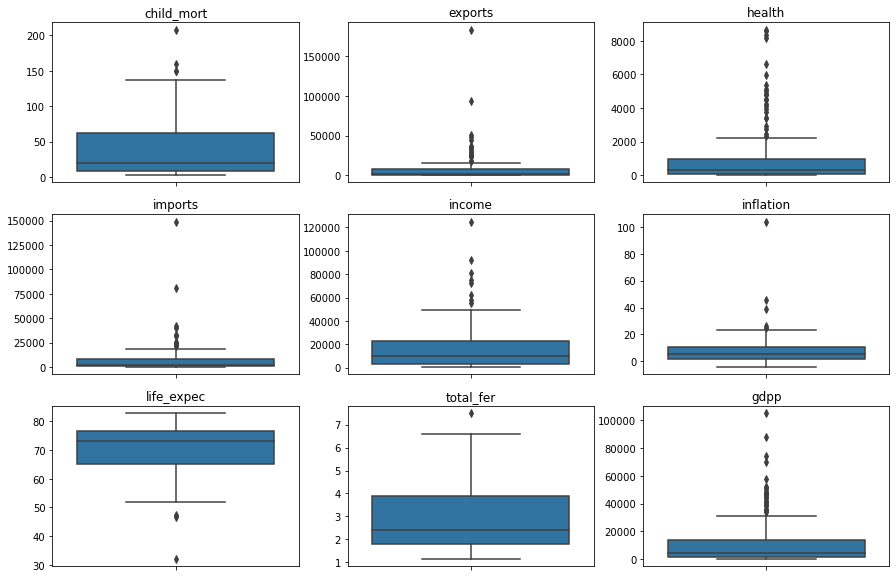

In [23]:
outlier_plot()

#### Strategy for outlier treatment:

- While 'child_mort' has high outliers, it is also a very good indicator for countries that require aid. So, we shall not treat outliers in the higher range for this variable.
- Similarly, for 'income' and 'gdpp' we will not be treating outliers at the lower end as these variables can help us in determining countries that are in need of aid.
- We can then opt for outlier treatment of all the other variables according to our requirements to find countries with need for aid.

We shall opt for a capping/flooring approach with 1 and 99 percentile values.

In [24]:
Q1 = df.child_mort.quantile(0.01)
df['child_mort'][df['child_mort']<=Q1]=Q1

In [25]:
Q1 = df.inflation.quantile(0.01)
Q3 = df.exports.quantile(0.99)
df['inflation'][df['inflation']<=Q1]=Q1
df['inflation'][df['inflation']>=Q3]=Q3

In [26]:
Q3 = df.income.quantile(0.99)
df['income'][df['income']>=Q3]=Q3

In [27]:
Q3 = df.gdpp.quantile(0.99)
df['gdpp'][df['gdpp']>=Q3]=Q3

In [28]:
Q3 = df.exports.quantile(0.99)
Q1 = df.exports.quantile(0.01)
df['exports'][df['exports']<=Q1]=Q1
df['exports'][df['exports']>=Q3]=Q3

In [29]:
Q3 = df.imports.quantile(0.99)
Q1 = df.imports.quantile(0.01)
df['imports'][df['imports']<=Q1]=Q1
df['imports'][df['imports']>=Q3]=Q3

In [30]:
Q3 = df.health.quantile(0.99)
Q1 = df.health.quantile(0.01)
df['health'][df['health']<=Q1]=Q1
df['health'][df['health']>=Q3]=Q3

In [31]:
Q3 = df.life_expec.quantile(0.99)
Q1 = df.life_expec.quantile(0.01)
df['life_expec'][df['life_expec']<=Q1]=Q1
df['life_expec'][df['life_expec']>=Q3]=Q3

In [32]:
Q3 = df.total_fer.quantile(0.99)
Q1 = df.total_fer.quantile(0.01)
df['total_fer'][df['total_fer']<=Q1]=Q1
df['total_fer'][df['total_fer']>=Q3]=Q3

In [33]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.351334,1054.240319,5873.845499,16857.550898,7.798194,70.645269,2.942896,12756.826347
std,40.327869,11415.230052,1790.825675,9422.259867,17957.012855,10.553699,8.553975,1.497595,17430.208938
min,2.800000,22.243716,17.009362,104.909640,609.000000,-2.348800,47.160000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,6.563600,79088.000000


### Clustering Tendency:

**KMeans Clustering will always give us K clusters, even when the clustering is not meaningful. Hence, we need to first understand whether a dataset is ideal for clustering or not(clustering tendency).**

*Hopkins statistic is a measure of a dataset's clustering tendency. A value close to 1 shows that the data has high clustering tendency, whereas a value closer to 0.5 indicates the distribution of data to be at random and not ideal for clustering. Hopkins statistic value closer to 0 shows the data distribution be such that it is meaningless to aplly clustering.*

In [34]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(df[df.columns[1:]])

0.9171864484640883

***The value of Hopkins statistic show that the data is good for clustering.***

In [35]:
# Scaling on numerical features

scaler = StandardScaler() # instantiate scaler

df_scaled = scaler.fit_transform(df[df.columns[1:]]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[1:]) # convert to dataframe
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569638,-0.566983,-0.598844,-0.851668,0.156035,-1.693799,1.926928,-0.702259
1,-0.538993,-0.473873,-0.440417,-0.413679,-0.386946,-0.314406,0.663053,-0.865911,-0.498726
2,-0.272870,-0.424015,-0.486295,-0.476198,-0.221053,0.788991,0.686504,-0.035427,-0.477434
3,2.007831,-0.381264,-0.534113,-0.464070,-0.612045,1.387733,-1.236499,2.154642,-0.530950
4,-0.695682,-0.086754,-0.178431,0.139659,0.125254,-0.604273,0.721681,-0.544433,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225614,-0.452889,-0.503129,-0.458660,-0.776821,-0.492128,-0.896456,0.373118,-0.563175
163,-0.526557,-0.236434,-0.219210,-0.372349,-0.019971,3.621138,0.557522,-0.316720,0.042765
164,-0.372355,-0.491622,-0.540275,-0.513436,-0.690802,0.408837,0.287833,-0.664988,-0.658699
165,0.448399,-0.539966,-0.552454,-0.577305,-0.691361,1.501780,-0.368803,1.156721,-0.658699


## K-Means Clustering:

*Before applying KMeans Clustering, it is important for us to determine the value of 'k'(number of clusters.*

Here, we will utilize two methods to determine that:
1. Silhouette Score : This takes into consideration the cohesion of points in a cluster and separation of one cluster from the others. The value of silhouette score varies from 1 to -1. A value closer to 1, is preferrable.
2. Elbow plot/SSD : We form clusters with various values of k and plot the Sum of Squared distances(SSD) of samples to their closest cluster centre. A low value is preferred here, but after a certain point increasing the number of clusters doesn't impact the SSD value too much.

We will determine the optimum value of 'k' using both these values in tandem.

for k=2 the silhouette score is 0.47850037660087275
for k=3 the silhouette score is 0.42498336839661177
for k=4 the silhouette score is 0.41079837932721047
for k=5 the silhouette score is 0.4171817303922743
for k=6 the silhouette score is 0.31733282784850764
for k=7 the silhouette score is 0.304918454118797


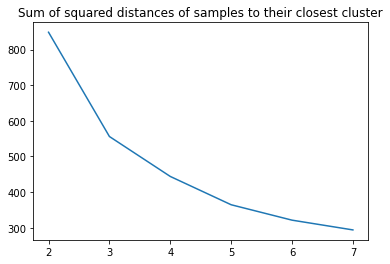

In [36]:
range_n = [2,3,4,5,6,7] #
ssd = []
for num in range_n:
        kmeans =KMeans(n_clusters = num, max_iter = 50, random_state = 99).fit(df_scaled)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df_scaled,cluster_labels)
        print('for k={0} the silhouette score is {1}'.format(num,silhouette_avg)) #To calculate the silhouette score for each cluster size
        ssd.append([num, kmeans.inertia_]) #To calculate the ssd for each cluster size

elbow = pd.DataFrame(ssd)
plt.title('Sum of squared distances of samples to their closest cluster')
plt.plot(elbow[0], elbow[1])
plt.show()

*From the above results, it is clear that a value of k=3 is ideal for our problem.*

In [37]:
kmeans =KMeans(n_clusters = 3, max_iter = 50, random_state = 99).fit(df_scaled)

In [38]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [39]:
#Assignind clustering labels to their respective countries.
df['Cluster_Label'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [40]:
df.Cluster_Label.value_counts()

0    92
1    48
2    27
Name: Cluster_Label, dtype: int64

#### We can see that there is a significant distribution of countries in the three clusters. Now, let's look at the spread of variables acroos the three clusters to identify patterns and clustering properties:

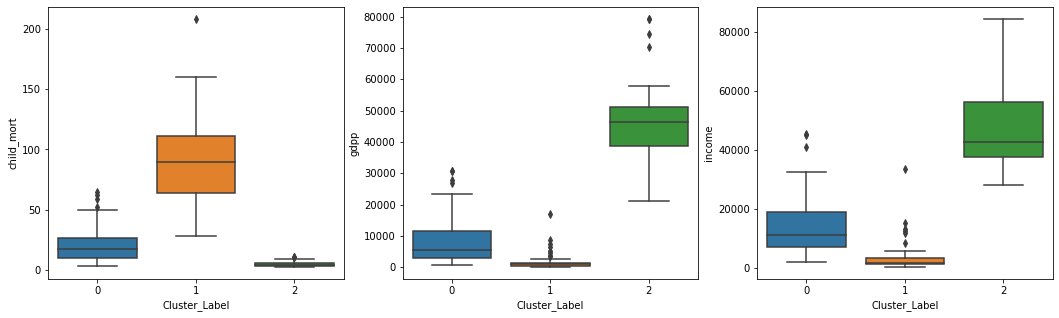

In [41]:
plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_Label', y='child_mort', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_Label', y='gdpp', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_Label', y='income', data=df)

plt.show()

#### We can clearly see that the three clusters have clear patterns.

- Cluster_Label 0 is of countries with medium income and GDPP, while they also have a slightly higher Child Mortality. These are developing countries with slightly better socio-economic conditions.

- Cluster_Label 1 consists of countries with very low income and GDPP, while they also have the highest Child Mortality. These are under-developed/poor countries. These are the countries that are in the most need of financial aid.

- Cluster_Label 2 consists of countries with very high income and GDPP, while they also have extremely low Child Mortality. These are developed countries with the best socio-economic conditions.

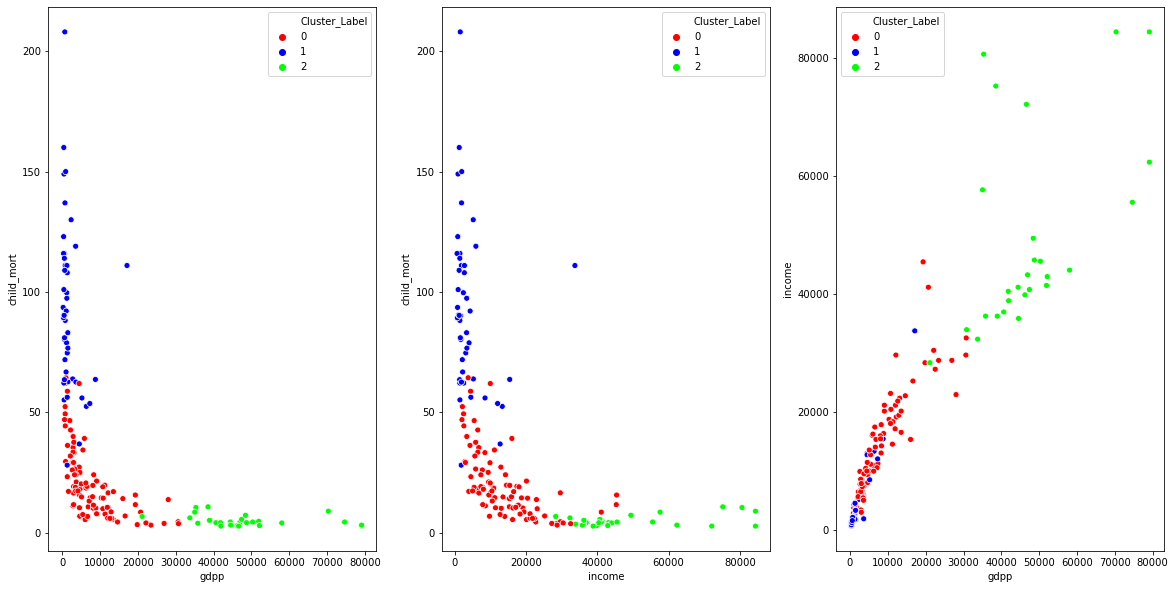

In [42]:
plt.figure(figsize = [20,10])
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_Label', data=df, palette = ['red','blue','lime'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_Label', data=df, palette = ['red','blue','lime'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_Label', data=df, palette = ['red','blue','lime'])
plt.show()

In [43]:
df.groupby('Cluster_Label')[['gdpp','income','child_mort']].agg(['mean','median'])

gdpp                 income          child_mort       
                       mean   median          mean   median       mean median
Cluster_Label                                                                
0               8226.869565   5645.0  14169.456522  11300.0  20.177174  17.15
1               1909.208333    932.0   3897.354167   1860.0  91.610417  89.75
2              47476.888889  46200.0  49057.333333  42900.0   5.100000   4.30

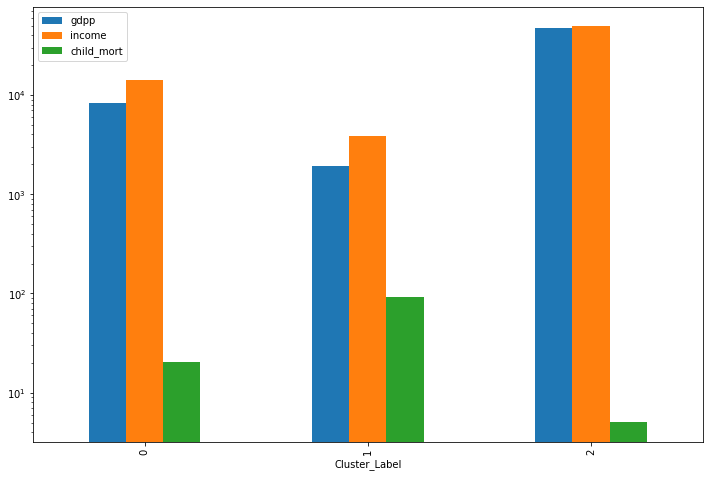

In [44]:
df.groupby('Cluster_Label')[['gdpp','income','child_mort']].mean().plot(kind = 'bar',logy=True, figsize =(12,8))

#### The visualization above confirm our previous inferences.
We see the same spread of values across the three clusters as seen in the previous graphs.

### Cluster Profiling:

In [45]:
# Medium income, Medium GDPP and Slightly high Child Mortality
df[df.Cluster_Label == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,0


In [46]:
#Low income, Low GDPP and high Child Mortality
df[df.Cluster_Label == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
0,Afghanistan,90.2,55.300000,41.917400,248.29700,1610.0,9.440,56.20,5.8200,553.0,1
3,Angola,119.0,2199.190000,100.605000,1514.37000,5900.0,22.400,60.10,6.1600,3530.0,1
17,Benin,111.0,180.404000,31.078000,281.97600,1820.0,0.885,61.80,5.3600,758.0,1
21,Botswana,52.5,2768.600000,527.050000,3257.55000,13300.0,8.920,57.10,2.8800,6350.0,1
25,Burkina Faso,116.0,110.400000,38.755000,170.20000,1430.0,6.810,57.90,5.8700,575.0,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.0,12.300,57.70,6.2600,231.0,1
28,Cameroon,108.0,290.820000,67.203000,353.70000,2660.0,1.910,57.30,5.1100,1310.0,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.0,2.010,47.50,5.2100,446.0,1
32,Chad,150.0,330.096000,40.634100,390.19500,1930.0,6.390,56.50,6.5636,897.0,1
36,Comoros,88.2,126.885000,34.681900,397.57300,1410.0,3.870,65.90,4.7500,769.0,1


In [47]:
# Developed Countries: High income, High GDPP and Low Child Mortality
df[df.Cluster_Label == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.1600,82.00,1.9300,51900.0,2
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.8730,80.50,1.4400,46900.0,2
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.8800,80.00,1.8600,44400.0,2
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.7000,77.10,1.8400,35300.0,2
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.8700,81.30,1.6300,47400.0,2
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.0100,79.90,1.4200,30800.0,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.2200,79.50,1.8700,58000.0,2
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.3510,80.00,1.8700,46200.0,2
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.0500,81.40,2.0300,40600.0,2
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.7580,80.10,1.3900,41800.0,2


### Identification of countries that require aid on priority using K-means algorithm:

In [48]:
K_top10 = df[df['Cluster_Label'] ==1].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
K_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
26,Burundi,93.6,22.243716,26.796000,104.90964,764.0,12.30,57.7,6.2600,231.0,1
88,Liberia,89.3,62.457000,38.586000,302.80200,700.0,5.47,60.8,5.0200,327.0,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,609.0,20.80,57.5,6.5400,334.0,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.0,2.55,58.8,6.5636,348.0,1
132,Sierra Leone,160.0,67.032000,52.269000,137.65500,1220.0,17.20,55.0,5.2000,399.0,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.0,8.79,60.8,4.6000,413.0,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.0,7.64,54.5,5.5600,419.0,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.0,2.01,47.5,5.2100,446.0,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.0,12.10,53.1,5.3100,459.0,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.0,11.60,61.7,4.6100,482.0,1


#### These are the countries that require financial aid on priority on the basis of K-means algorithm.

#### Next, we'll use another technique called Hierarchical clustering and see if we can identify any other country that might require financial aid, different from the ones we've figured out so far. At the end, we'll collate the findings from the two different methods and present our report.

## Hierarchical Clustering:

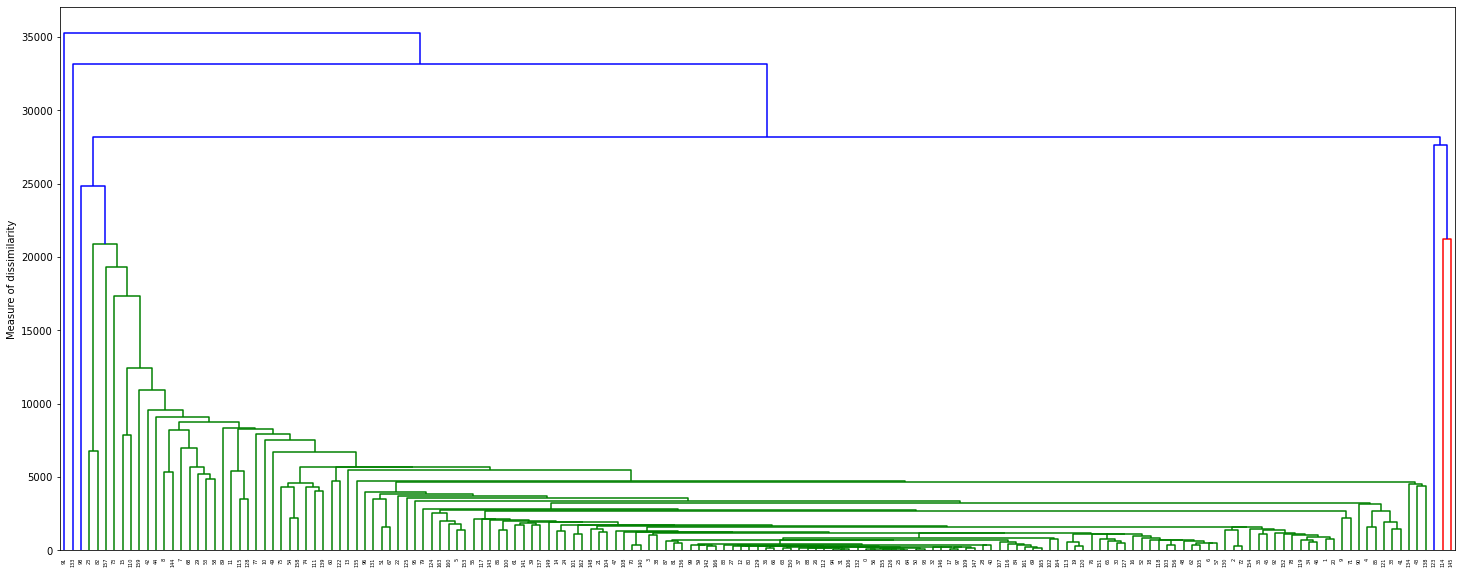

In [49]:
plt.figure(figsize=(25, 10))
mergings_s = linkage(df[df.columns[1:-1]], method = 'single', metric = 'euclidean')
plt.ylabel('Measure of dissimilarity')
dendrogram(mergings_s)
plt.show()

#### The dendrogram obtained using single linkage is not easily interpretable and hence not useful for our clustering purposes.

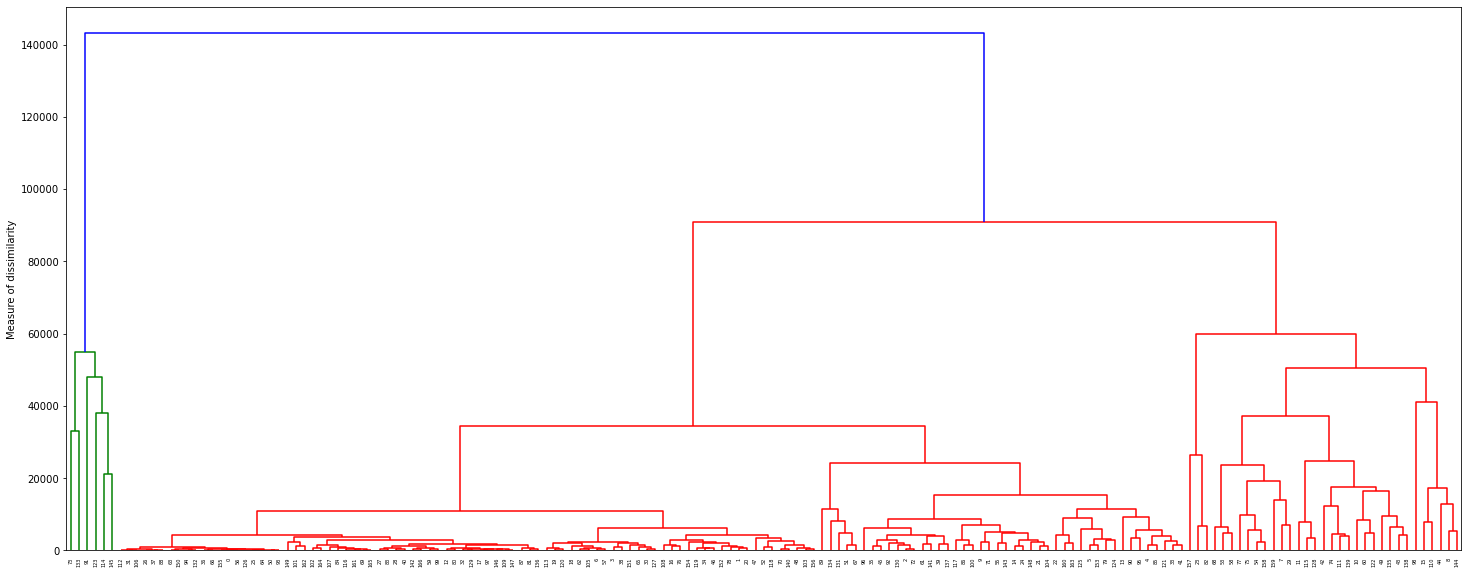

In [50]:
plt.figure(figsize=(25, 10))
mergings_c = linkage(df[df.columns[1:-1]], method = 'complete', metric = 'euclidean')
plt.ylabel('Measure of dissimilarity')
dendrogram(mergings_c)
plt.show()

#### We can see that the dendrogram is much better, in terms of interpretability and hence we'll opt for this as our linkage of choice.

#### Now, we can see that cutting the dendrogram to form 2 clusters doesn't give us an adequate spread of countries across the clusters whereas 4 clusters will not give us clusters with high inter-cluster separation. Also, based on our clustering using KMeans, we have seen how the choice of 3 clusters give us clearly separable clusters. So, we'll opt for 3 clusters under the Hierarchical clustering using complete linkage.

In [51]:
Cluster_ID = cut_tree(mergings_c, n_clusters = 3).reshape(-1, )
Cluster_ID

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
#Assigning clustering labels to their resective countries
df['Cluster_ID'] = Cluster_ID
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [53]:
df.Cluster_ID.value_counts()

0    128
1     33
2      6
Name: Cluster_ID, dtype: int64

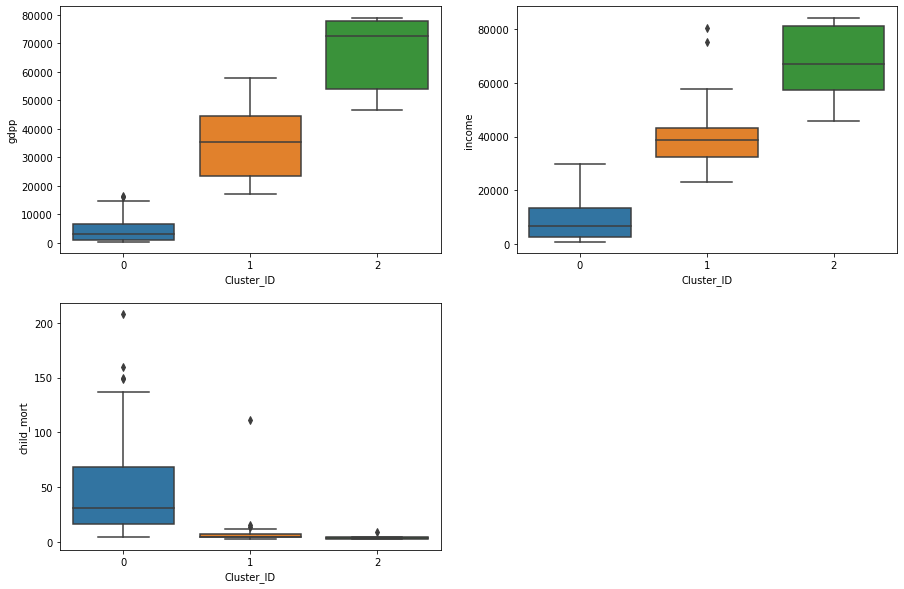

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Cluster_ID', y = 'gdpp', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Cluster_ID', y = 'income', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Cluster_ID', y = 'child_mort', data = df)
plt.show()

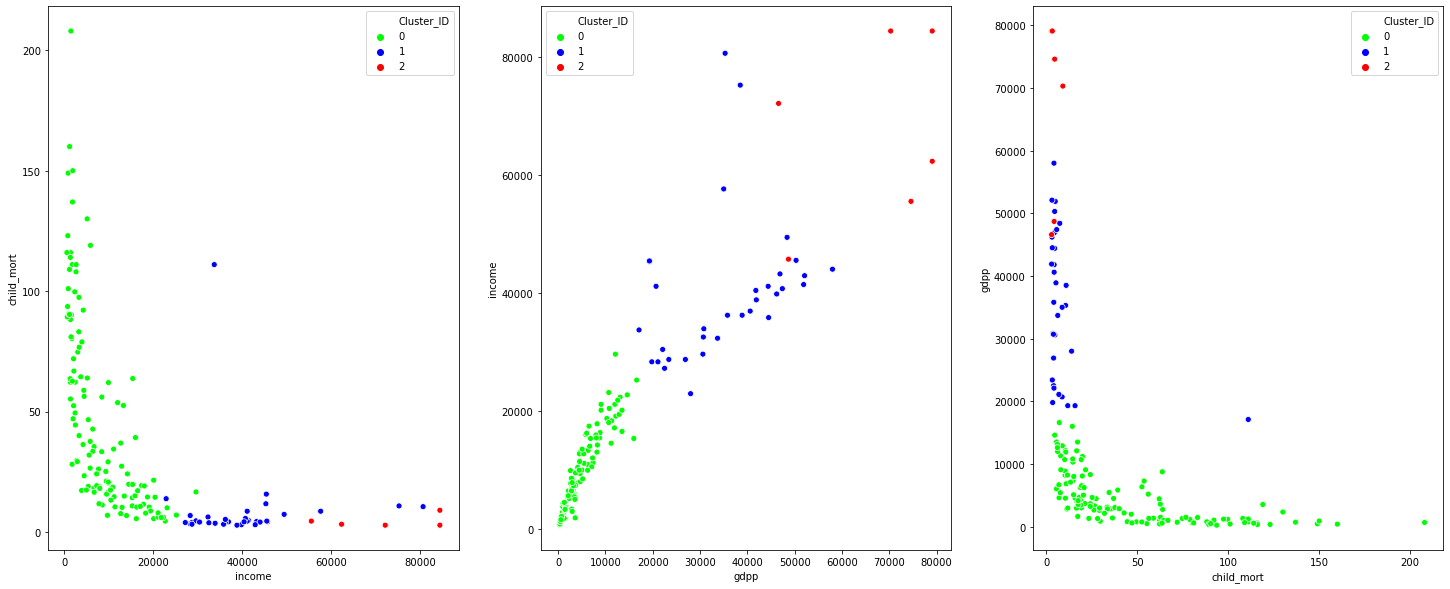

In [55]:
plt.figure(figsize = (25,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_ID',data = df, palette = ['lime','blue','red'])
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_ID', data = df, palette = ['lime','blue','red'])
plt.subplot(1,3,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_ID', data=df, palette = ['lime','blue','red'])
plt.show()

#### We can clearly sense a pattern here.

- Cluster_ID 0 is of countries with very low income and GDPP, while they also have the highest Child Mortality. These are under-developed/poor countries. These are the countries that are in the most need of financial aid and the focus of our analysis.

- Cluster_ID 1 consists of countries with medium income and GDPP, while they also have a slightly higher Child Mortality. These are developing countries with slightly better socio-economic conditions.

- Cluster_ID 2 consists of countries with very high income and GDPP, while they also have extremely low Child Mortality. These are developed countries with the best socio-economic conditions.

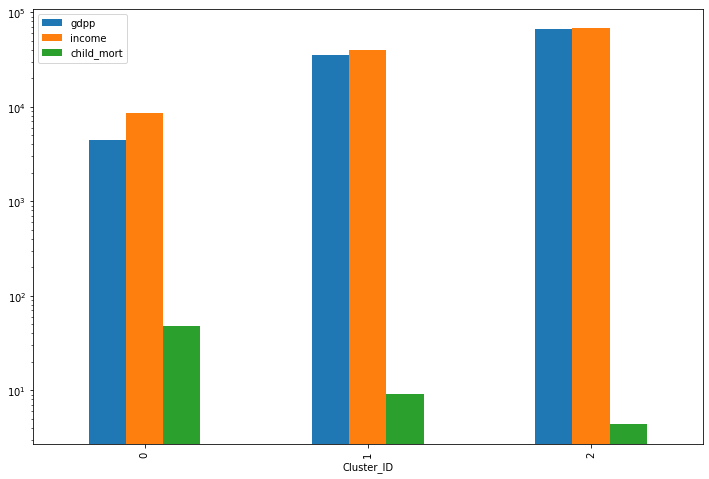

In [56]:
df.groupby('Cluster_ID')[['gdpp','income','child_mort']].mean().plot(kind = 'bar', logy=True, figsize =(12,8))

### Identification of countries that require aid on priority using K-means algorithm:

In [57]:
H_top10 = df[df['Cluster_ID'] ==0].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
H_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label,Cluster_ID
26,Burundi,93.6,22.243716,26.796000,104.90964,764.0,12.30,57.7,6.2600,231.0,1,0
88,Liberia,89.3,62.457000,38.586000,302.80200,700.0,5.47,60.8,5.0200,327.0,1,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,609.0,20.80,57.5,6.5400,334.0,1,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.0,2.55,58.8,6.5636,348.0,1,0
132,Sierra Leone,160.0,67.032000,52.269000,137.65500,1220.0,17.20,55.0,5.2000,399.0,1,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.0,8.79,60.8,4.6000,413.0,1,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.0,7.64,54.5,5.5600,419.0,1,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.0,2.01,47.5,5.2100,446.0,1,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.0,12.10,53.1,5.3100,459.0,1,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.0,11.60,61.7,4.6100,482.0,1,0


#### As we can see, these are the exact same countries that we obtained after clustering based on KMeans algortihm.

#### This confirms the fact that these 10 countries are in the direst need of financial aid. We chose 10 countries for each clustering method to account for differences. But since, the results are exactly the same, we just need to select the top 5 countries which need aid on priority using any of the two methods.

In [58]:
Priority_df = H_top10.head()
Priority_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label,Cluster_ID
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.0,5.0
mean,116.380000,73.252543,32.405440,176.379728,821.400000,11.664000,57.960000,5.91672,327.800000,1.0,0.0
std,28.279533,41.448504,13.311856,75.391271,235.628521,7.680314,2.110213,0.74876,61.005737,0.0,0.0
min,89.300000,22.243716,17.956800,104.909640,609.000000,2.550000,55.000000,5.02000,231.000000,1.0,0.0
25%,93.600000,62.457000,26.419400,137.655000,700.000000,5.470000,57.500000,5.20000,327.000000,1.0,0.0
50%,116.000000,67.032000,26.796000,165.664000,764.000000,12.300000,57.700000,6.26000,334.000000,1.0,0.0
75%,123.000000,77.256000,38.586000,170.868000,814.000000,17.200000,58.800000,6.54000,348.000000,1.0,0.0
max,160.000000,137.274000,52.269000,302.802000,1220.000000,20.800000,60.800000,6.56360,399.000000,1.0,0.0


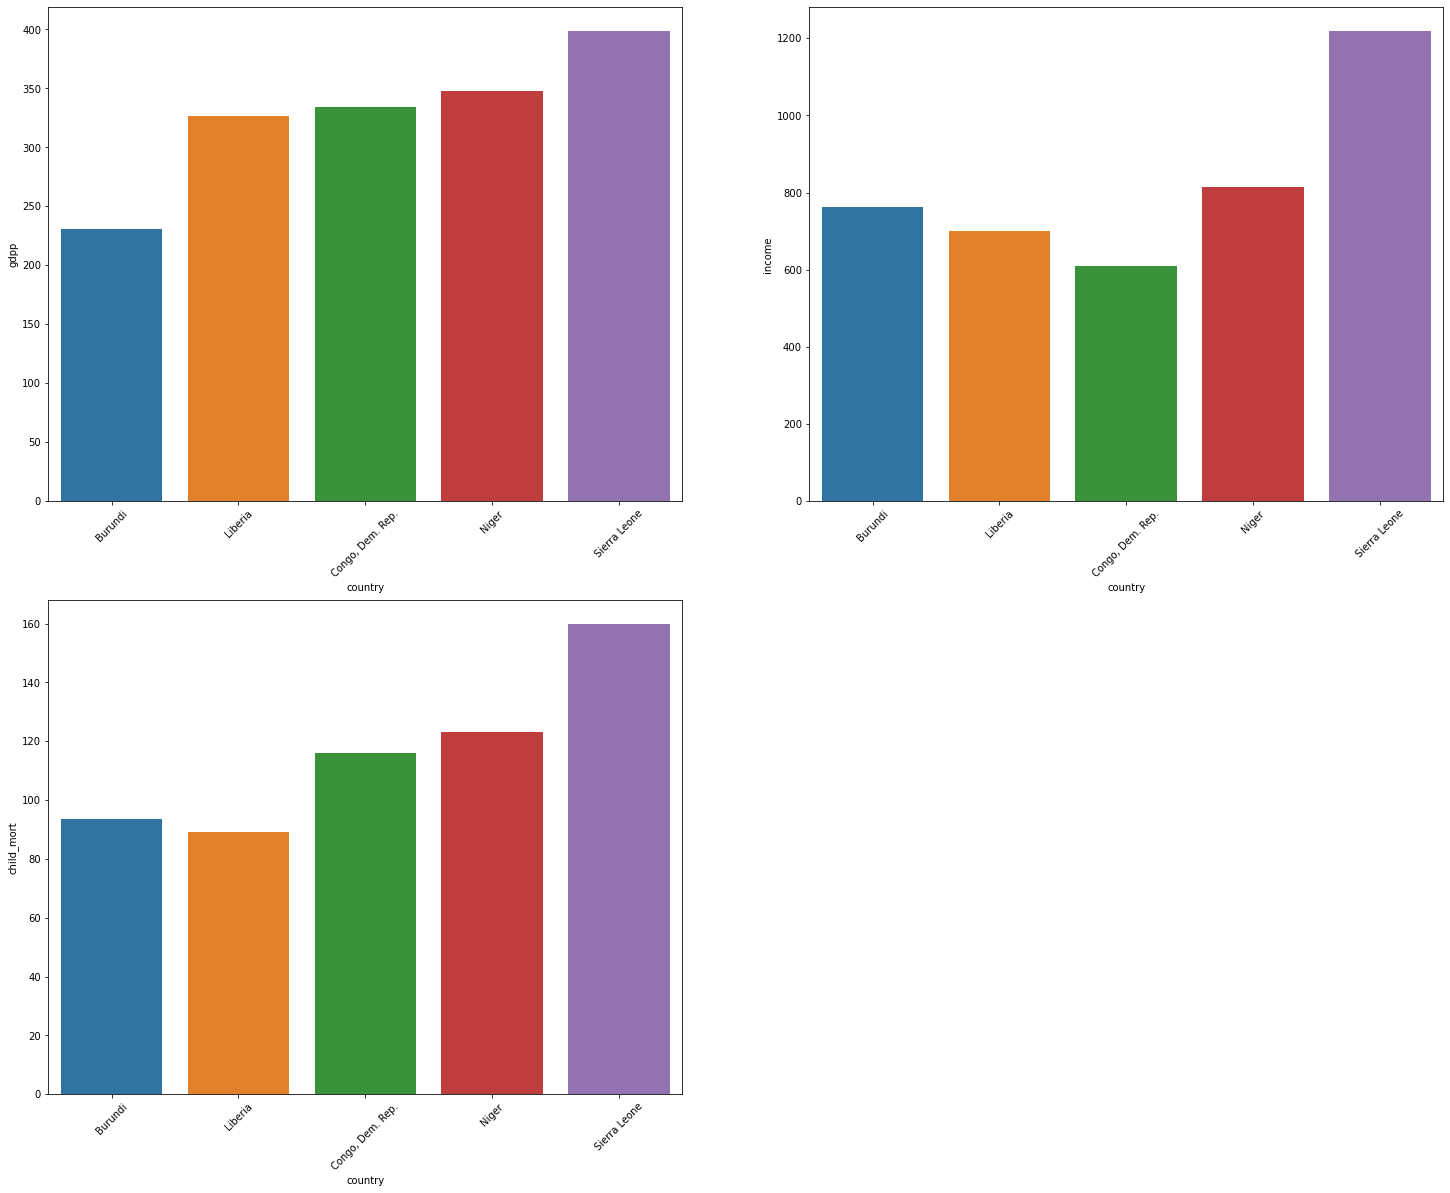

In [59]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.barplot(x = 'country', y = 'gdpp', data = Priority_df)
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
sns.barplot(x = 'country', y = 'income', data = Priority_df)
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.barplot(x = 'country', y = 'child_mort', data = Priority_df)
plt.xticks(rotation = 45)
plt.show()

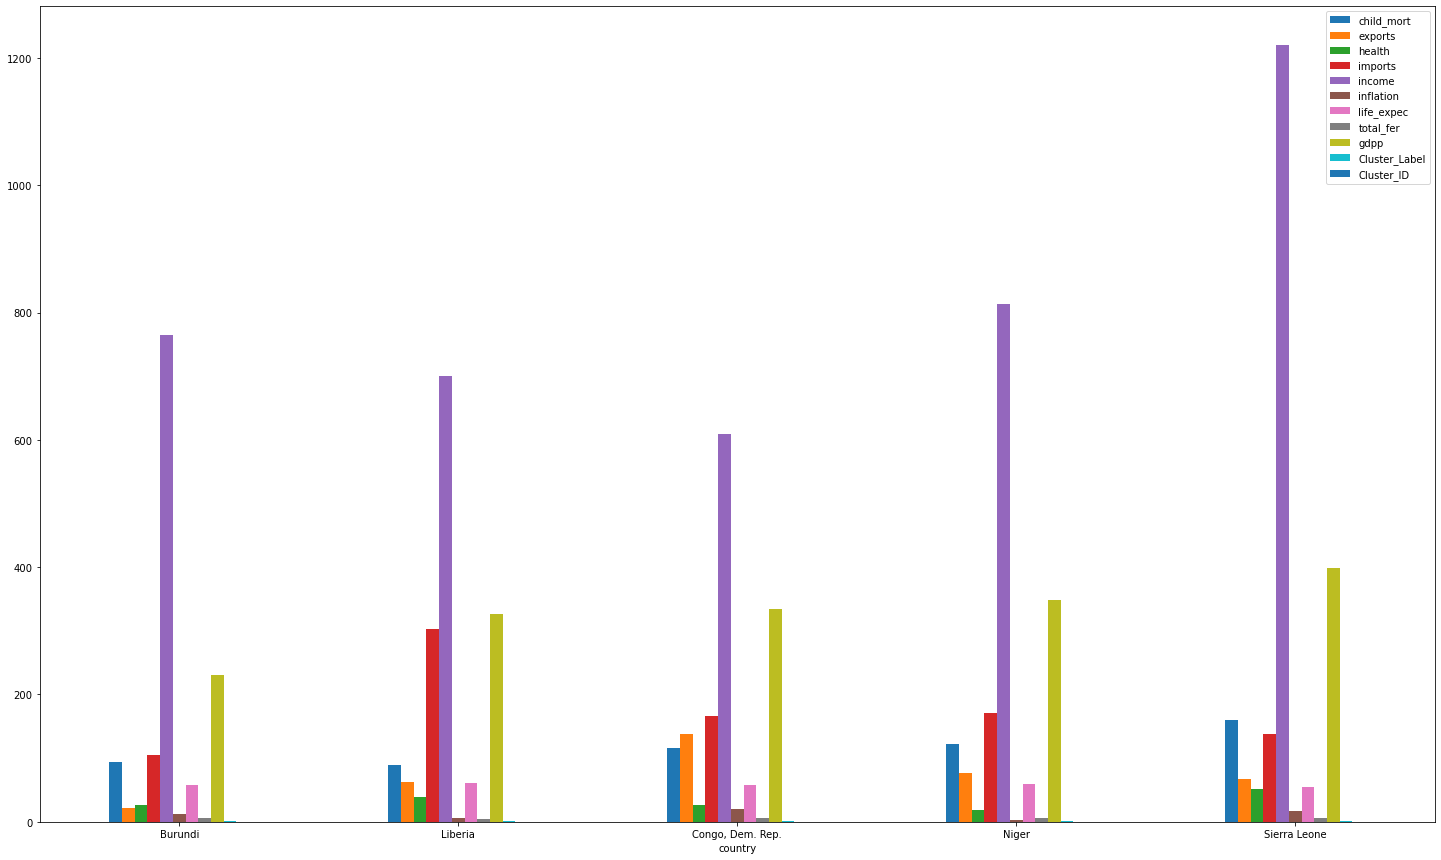

In [60]:
Priority_df.set_index('country').plot(kind='bar',figsize = [25,15], rot = 0)
plt.show()

### The final list of countries in need of financial aid:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone